# 선형 회귀분석
결과를 바탕으로 관계를 역으로 찾아서 거슬러 올라가는 느낌이라 회귀라고 부르는 것은 아닌가 합니다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
picher_file_path = "./resources/data/picher_stats_2017.csv"
picher = pd.read_csv(picher_file_path)

In [4]:
picher.head()   # 상위 5행만 출력

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [5]:
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [6]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))
# FONT 리스트 확인

{'Agency FB',
 'Algerian',
 'Ami R',
 'Arial',
 'Arial Rounded MT Bold',
 'Bahnschrift',
 'Baskerville Old Face',
 'Batang',
 'Bauhaus 93',
 'Bell MT',
 'Berlin Sans FB',
 'Berlin Sans FB Demi',
 'Bernard MT Condensed',
 'Blackadder ITC',
 'Bodoni MT',
 'Book Antiqua',
 'Bookman Old Style',
 'Bookshelf Symbol 7',
 'Bradley Hand ITC',
 'Britannic Bold',
 'Broadway',
 'Brush Script MT',
 'Calibri',
 'Californian FB',
 'Calisto MT',
 'Cambria',
 'Candara',
 'Castellar',
 'Centaur',
 'Century',
 'Century Gothic',
 'Century Schoolbook',
 'Chiller',
 'Colonna MT',
 'Comic Sans MS',
 'Consolas',
 'Constantia',
 'Cooper Black',
 'Copperplate Gothic Bold',
 'Copperplate Gothic Light',
 'Corbel',
 'Courier New',
 'Curlz MT',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'Dubai',
 'Ebrima',
 'Edwardian Script ITC',
 'Elephant',
 'Engravers MT',
 'Eras Bold ITC',
 'Eras Demi ITC',
 'Eras Light ITC',
 'Eras Medium ITC',
 'Felix Titling',
 'F

In [7]:
mpl.rc('font', family='Batang')

<AxesSubplot:>

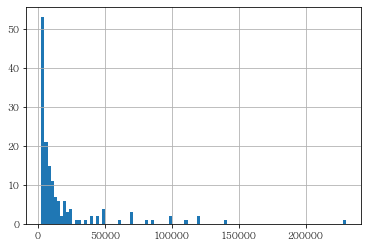

In [8]:
picher['연봉(2018)'].hist(bins=100)

<AxesSubplot:>

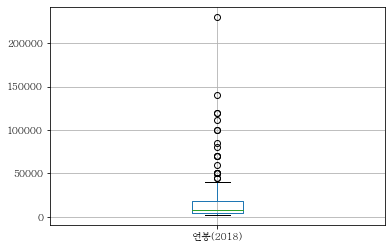

In [9]:
picher.boxplot(column=["연봉(2018)"])

<AxesSubplot:xlabel='연봉(2018)', ylabel='Density'>

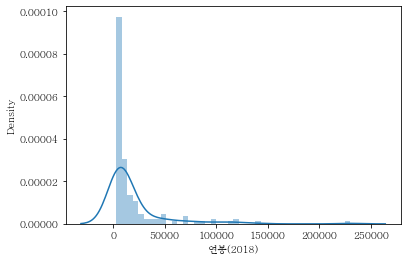

In [10]:
from seaborn import distplot
distplot(picher['연봉(2018)'])

In [11]:
# 피처 각각에 대한 scaling을 수행하는 함수를 정의합니다.
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [12]:
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)
picher_df

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,-0.309907,0.588357,-0.306452,-0.585705,0.680497,0.214300,-0.112010,0.104300,...,0.363854,0.162874,-1.002712,0.411349,-1.229537,0.375810,0.475992,-0.859111,7100,-0.335587
148,정용운,KIA,-0.051084,-0.369825,-0.306452,-0.585705,-0.543592,-0.198678,0.503369,0.042667,...,-0.147418,-0.871003,-0.269422,-0.030253,-0.361721,0.482702,0.622339,-0.874237,7500,-0.535215
149,노경은,롯데,-0.827554,-0.369825,-0.306452,-0.585705,-0.543592,-1.024633,-0.419699,-0.850019,...,1.219251,0.466294,-1.356417,1.347354,-1.023431,1.348527,1.389397,-0.964995,10000,-0.020173
150,김승현,삼성,-0.827554,-0.050431,-0.306452,-0.364245,-0.543592,0.627278,-0.624825,-0.273451,...,0.226204,0.005545,0.463869,-0.066253,-0.790205,0.728554,0.713175,-1.033063,4000,-0.543201


In [13]:
picher_df=picher_df.rename(columns={'연봉(2018)' : 'y'})
picher_df

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,-0.309907,0.588357,-0.306452,-0.585705,0.680497,0.214300,-0.112010,0.104300,...,0.363854,0.162874,-1.002712,0.411349,-1.229537,0.375810,0.475992,-0.859111,7100,-0.335587
148,정용운,KIA,-0.051084,-0.369825,-0.306452,-0.585705,-0.543592,-0.198678,0.503369,0.042667,...,-0.147418,-0.871003,-0.269422,-0.030253,-0.361721,0.482702,0.622339,-0.874237,7500,-0.535215
149,노경은,롯데,-0.827554,-0.369825,-0.306452,-0.585705,-0.543592,-1.024633,-0.419699,-0.850019,...,1.219251,0.466294,-1.356417,1.347354,-1.023431,1.348527,1.389397,-0.964995,10000,-0.020173
150,김승현,삼성,-0.827554,-0.050431,-0.306452,-0.364245,-0.543592,0.627278,-0.624825,-0.273451,...,0.226204,0.005545,0.463869,-0.066253,-0.790205,0.728554,0.713175,-1.033063,4000,-0.543201


In [14]:
# 데이터 정제과정
picher_df = picher_df.drop('선수명', axis=1)

In [15]:
team_encoding = pd.get_dummies(picher_df['팀명'])

#더미로 만든 뒤 '팀명'은 필요가 없어졌으니 삭제
picher_df = picher_df.drop('팀명', axis=1)
team_encoding

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
147,0,0,0,0,0,0,0,0,1
148,1,0,0,0,0,0,0,0,0
149,0,0,0,0,0,0,1,0,0
150,0,0,0,0,0,0,0,1,0


In [16]:
picher_df.join(team_encoding)

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,-0.869000,...,2.734705,0,0,0,0,1,0,0,0,0
1,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,-0.987502,...,1.337303,0,0,1,0,0,0,0,0,0
2,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,-0.885929,...,5.329881,1,0,0,0,0,0,0,0,0
3,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,-0.945180,...,3.333592,0,0,1,0,0,0,0,0,0
4,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,-0.877464,...,2.734705,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-0.309907,0.588357,-0.306452,-0.585705,0.680497,0.214300,-0.112010,0.104300,-0.968896,-0.373829,...,-0.335587,0,0,0,0,0,0,0,0,1
148,-0.051084,-0.369825,-0.306452,-0.585705,-0.543592,-0.198678,0.503369,0.042667,-0.777918,0.603817,...,-0.535215,1,0,0,0,0,0,0,0,0
149,-0.827554,-0.369825,-0.306452,-0.585705,-0.543592,-1.024633,-0.419699,-0.850019,-0.756699,0.307561,...,-0.020173,0,0,0,0,0,0,1,0,0
150,-0.827554,-0.050431,-0.306452,-0.364245,-0.543592,0.627278,-0.624825,-0.273451,0.205264,1.196330,...,-0.543201,0,0,0,0,0,0,0,1,0


## 회귀분석 진행
- 학습데이터 (80%), 검증데이터 (20%)

In [17]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [18]:
x = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
x_train, x_text, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19)
# test_size : 검증 (20%만 하겠다)

In [19]:
ir = linear_model.LinearRegression()
model = ir.fit(x_train, y_train)

In [20]:
print(ir.coef_) # 학습된 계수 출력 (기울기)

[ -1294.53459208   -298.40705653 -84759.52189929  -1178.69920284
   3736.80528617  10234.97461011  69998.46903908  -2442.03978171
   6505.72426993   1491.62486376   4815.1162816   -5439.14323109
   -396.32170872   -379.83698124  19160.89939193   1707.22866561
   1665.17642611  -1092.43099242  16452.88104238]


In [21]:
print(ir.intercept_)    # 상수항 출력 (절편)

18772.443838483523


In [22]:
x_new = x_text
y_new = model.predict(x_new)
print(type(y_test))

<class 'pandas.core.series.Series'>


In [23]:
y_compare={'y_test':y_test, 'y_predicted':y_new}
y_compare = pd.DataFrame(y_compare)

<AxesSubplot:>

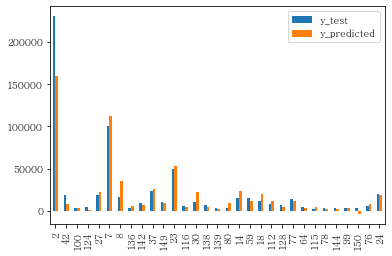

In [24]:
mpl.rc('font', family='Batang')
y_compare.plot(y=['y_test', 'y_predicted'], kind="bar")

In [25]:
x_train

,BABIP,ERA,FIP,LOB%,RA9-WAR,WAR,kFIP,경기,볼넷/9,블론,삼진/9,선발,세,승,연봉(2017),이닝,패,홀드,홈런/9
94,0.544959,0.708951,-0.548806,-2.460666,-0.665457,-0.488518,-0.492924,-1.334367,1.086292,-0.543592,-0.105959,-0.624825,-0.306452,-0.827554,-0.463349,-1.052812,-1.008613,-0.585705,-1.189625
118,-0.016931,-0.611056,0.386499,1.404205,-0.410536,-0.564149,0.390203,-0.869767,-0.712407,-0.543592,-0.548038,-0.624825,-0.306452,-0.827554,-0.499282,-0.774469,-1.008613,-0.364245,0.776804
109,-0.185498,0.399349,1.022507,-0.079629,-0.584099,-0.541460,1.056332,-1.231122,1.492586,-0.543592,-0.311084,-0.317136,-0.306452,-0.568731,-0.547193,-0.909664,-0.689219,-0.585705,0.324526
5,-0.578820,-0.721456,-0.580874,0.653661,2.963100,2.476226,-0.614039,-0.147055,-1.034057,-0.543592,0.130995,2.041816,-0.306452,1.243035,0.738417,2.048726,2.185327,-0.585705,-0.088425
75,-0.084357,0.245749,-0.067792,-1.002712,-0.594947,-0.405324,-0.008466,-0.560033,0.679997,-0.543592,-0.219131,-0.624825,-0.306452,-0.568731,-0.459357,-0.853995,-0.689219,0.300137,-0.560368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,0.095447,-0.260654,-0.490016,0.179179,0.289141,-0.148177,-0.381902,2.072700,-0.830910,-0.543592,-0.601087,-0.624825,-0.306452,0.984211,-0.259728,0.239495,0.268963,1.850362,-0.422718
19,-0.331589,-0.927857,-0.971030,1.844180,1.547475,0.872844,-1.093450,1.659722,-1.093308,2.516629,0.689782,-0.624825,7.387680,-0.568731,2.135819,0.100324,-0.050431,-0.585705,-0.186746
98,-0.084357,0.168948,-0.062447,-0.683515,-0.638337,-0.503644,0.021813,-0.405167,-0.102966,-0.543592,-0.204985,-0.317136,-0.306452,-0.568731,-0.551186,-0.496126,-0.689219,-0.585705,-0.363725
110,-0.016931,0.140148,0.541493,0.187806,-0.372569,-0.541460,0.521410,0.988633,0.134039,1.292541,-0.063520,-0.624825,1.357144,-0.309907,0.179456,-0.376836,0.907751,1.407441,0.668651


In [26]:
y_train

94      4000
118     4200
109     3500
5      85000
75      4200
       ...  
52     10000
19     70000
98      3400
110    18500
93      2700
Name: y, Length: 121, dtype: int64